In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import pearsonr
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial.distance import cdist 
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from datetime import timedelta, date
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_colwidth',None)

In [2]:
df9=pd.read_csv("exploration.csv", index_col=0, parse_dates=True)


In [3]:
# Convert the type of "order_purchase_timestamp" at datetime 
df9['order_purchase_timestamp']=pd.to_datetime(df9['order_purchase_timestamp'])

In [4]:
# Start of data
#----------------------
start=df9['order_purchase_timestamp'].min()
start

Timestamp('2016-10-03 09:44:50')

In [5]:
type(start)

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
# End of data
#---------------------
end=df9['order_purchase_timestamp'].max()
end

Timestamp('2018-08-29 15:00:37')

In [7]:
type(end)

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
df9.dtypes

customer_unique_id                  object
order_id                            object
order_purchase_timestamp    datetime64[ns]
order_item_id                        int64
product_category_name               object
product_category                    object
delivery_duration                  float64
total_cost                         float64
books_cds_media                    float64
fashion_clothing                   float64
gifts_flowers                      float64
health_beauty                      float64
others                             float64
sports_outdoor                     float64
technology                         float64
mean_score                         float64
total_orders                         int64
Recency                            float64
Frequency                          float64
Monetary                           float64
dtype: object

In [9]:
#df9[['order_purchase_timestamp']]

In [10]:


# Datetime operations
import datetime as dt


In [11]:
#Assign the next day after the last date recorded in the dataset as 'today'

today = dt.datetime(2018,8,30)
today


datetime.datetime(2018, 8, 30, 0, 0)

In [12]:
#dmin=dt.datetime(2016,10,3)

In [13]:
#dmax=dt.datetime(2017,10,3)

In [14]:
#df_y1.shape

<b> KMeans Clustering <b>

In [15]:
# Clustering Librairies import
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.pipeline import Pipeline, make_pipeline

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [17]:

def date_range(start, end, step: dt.timedelta):
    while start < end:
        yield start
        start += step


for d in date_range(start=dt.date(2016, 10, 3),end=dt.date(2016, 12, 3),step=dt.timedelta(days=15)):
    print(d)

2016-10-03
2016-10-18
2016-11-02
2016-11-17
2016-12-02


In [18]:
from math import *
from sklearn.metrics.cluster import adjusted_rand_score

<b> Etude temporelle: <b>

In [19]:
tmin=dt.datetime(2016,10,3)
tmin

datetime.datetime(2016, 10, 3, 0, 0)

In [20]:

tmax=dt.datetime(2017,10,3)
tmax


datetime.datetime(2017, 10, 3, 0, 0)

In [21]:
data=df9[['customer_unique_id','order_id','order_purchase_timestamp', 'delivery_duration','total_cost', 'mean_score', 'total_orders','Recency','Frequency','Monetary']]

In [22]:
data.head()

,customer_unique_id,order_id,order_purchase_timestamp,delivery_duration,total_cost,mean_score,total_orders,Recency,Frequency,Monetary
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,9.0,146.87,4.0,1,111.0,1.0,141.90
1,9eae34bbd3a474ec5d07949ca7de67c0,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,19.0,137.89,1.0,2,114.0,1.0,27.19
2,9eae34bbd3a474ec5d07949ca7de67c0,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,19.0,137.89,1.0,2,537.0,1.0,86.22
3,3c799d181c34d51f6d44bbbc563024db,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,19.0,140.61,3.0,1,321.0,1.0,43.62
4,23397e992b09769faf5e66f9e171a241,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,25.0,137.58,4.0,1,288.0,1.0,196.89


In [23]:
data.shape

(91521, 10)

In [24]:
data.dtypes

customer_unique_id                  object
order_id                            object
order_purchase_timestamp    datetime64[ns]
delivery_duration                  float64
total_cost                         float64
mean_score                         float64
total_orders                         int64
Recency                            float64
Frequency                          float64
Monetary                           float64
dtype: object

In [25]:
tmin0=dt.datetime(2016,10,3)
type(tmin0)

datetime.datetime

In [26]:
tmax0=dt.datetime(2017,10,3)
type(tmax0)

datetime.datetime

In [27]:
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format='%y-%m-%d')
    
df1=data[(data['order_purchase_timestamp'] >= tmin0)& (data['order_purchase_timestamp'] <= tmax0)]
df1.shape

/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_1345/1137859175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format='%y-%m-%d')


(25427, 10)

In [28]:
df1.dtypes

customer_unique_id                  object
order_id                            object
order_purchase_timestamp    datetime64[ns]
delivery_duration                  float64
total_cost                         float64
mean_score                         float64
total_orders                         int64
Recency                            float64
Frequency                          float64
Monetary                           float64
dtype: object

In [29]:
tmin1=dt.datetime(2016,10,10)
tmax1=dt.datetime(2017,10,10)

In [30]:
time1_year1 = (tmax1 - tmin1).days
print("La première année {} jours.".format(time1_year1))

La première année 365 jours.


In [31]:
df2=data[(data['order_purchase_timestamp'] >= tmin1)& (data['order_purchase_timestamp'] <= tmax1)]

In [32]:
len(df2)

26217

In [33]:
df3=df9[df9['order_purchase_timestamp'].dt.dayofyear <100]

In [34]:
len(df3)

27142

In [35]:
df2.head()

,customer_unique_id,order_id,order_purchase_timestamp,delivery_duration,total_cost,mean_score,total_orders,Recency,Frequency,Monetary
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,9.0,146.87,4.0,1,111.0,1.0,141.90
3,3c799d181c34d51f6d44bbbc563024db,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,19.0,140.61,3.0,1,321.0,1.0,43.62
5,567ab47ca4deb92d46dbf54dce07d0a7,574fe1739f65af76badd0999db300b4f,2017-03-23 15:10:17,19.0,142.05,4.0,1,146.0,1.0,166.98
6,f40ab89b622248b7ca125af4b486b887,e0b26f14d2bcc710bb02f77a4628763b,2017-05-16 10:00:49,13.0,155.70,4.0,1,131.0,1.0,35.38
7,749943913a9851a39c9baf51877fbab6,eaae5bd20fb15d85aa673d9b7c0e8ca5,2017-03-18 23:04:36,72.0,148.33,2.0,1,182.0,1.0,209.59


In [36]:
tmin=dt.datetime(2016,10,3)
for tmax in date_range(start=dt.datetime(2017, 10, 3),end=dt.datetime(2018, 8, 3),step=dt.timedelta(days=30)):
    df=data[(data['order_purchase_timestamp'] >= tmin)& (data['order_purchase_timestamp'] <= tmax)]
    print(len(df))


25427
29596
36939
41876
48432
55380
61935
68391
74869
80582
85623


In [37]:
time_period = int((end - start)/np.timedelta64(1,'M'))
print("La période complète des commandes en {} mois.".format(time_period))

La période complète des commandes en 22 mois.


In [38]:
type(end)

pandas._libs.tslibs.timestamps.Timestamp

In [39]:
tmin0=dt.datetime(2016,10,3)
tmax0=dt.datetime(2017,10,3)

In [40]:
type(tmin0)

datetime.datetime

In [41]:
time_year1 = (tmax0 - tmin0).days
print("La première année {} jours.".format(time_year1))

La première année 365 jours.


In [42]:
# Kmeans clustering pour la première année
#----------------------------------------------
data=df9[['customer_unique_id','order_id','order_purchase_timestamp', 'delivery_duration','total_cost', 'mean_score', 'total_orders','Recency','Frequency','Monetary']]
tmin0=dt.datetime(2016,10,3)
tmax0=dt.datetime(2017,10,3)
#---------------------------------------------------------------------------------------------------
    
# Faire le filtre temporel sur les données brute df9
    
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format='%y-%m-%d')
    
data=data[(data['order_purchase_timestamp'] >= tmin0)& (data['order_purchase_timestamp'] <= tmax0)]
#---------------------------------------------------------------------------------------------------
    
    # Calcul  de R,F, M après le filtre
    
    
rfm=data.groupby('customer_unique_id').\
agg({'order_purchase_timestamp':lambda x: (today-x.max()).days,'order_id':lambda x: x.nunique(),
                                         'total_cost':'mean'})
#renaming the columns of rfm

rfm['order_purchase_timestamp'] = rfm['order_purchase_timestamp'].astype(int)

rfm.rename(columns={'order_purchase_timestamp': 'Recency',
                         'order_id': 'Frequency',
                         'total_cost': 'Monetary'}, inplace=True)
    
#---------------------------------------------------------------------------------------------------
    # StandardScaler
    
scaler =StandardScaler()
        #scaler = MinMaxScaler()
        
data = data.drop(columns=['order_purchase_timestamp']) 
        
    
data = pd.DataFrame(scaler.fit_transform(data.select_dtypes('number')), index=data.select_dtypes('number').index, columns=data.select_dtypes('number').columns).reset_index()
#---------------------------------------------------------------------------------------------------
    # Kmeans 
     # Building clustering model with KMeans,  K=4 
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1000, random_state=20)
         # Fit and predict the KMeans model
y_kmeans=kmeans.fit_predict(data)             # y_kmeans = number of Clusters
    # calcul des scores
score = silhouette_score(data, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)
#---------------------------------------------------------------------------------------------------
  
data_clusters = pd.DataFrame(data.select_dtypes('number'))

data_clusters['Cluster'] = kmeans.labels_ 

data_clusters["customer_unique_id"]=df9["customer_unique_id"]
data_clusters=data_clusters.drop(columns=["index"])
data_clusters.rename(columns={"Cluster": "Cluster_initial"}, inplace=True)
data_t0=data_clusters[["Cluster_initial","customer_unique_id"]]
data_t0.head()



/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_1345/3985566527.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format='%y-%m-%d')


Silhouetter Score: 0.564


,Cluster_initial,customer_unique_id
0,2,861eff4711a542e4b93843c6dd7febb0
1,2,9eae34bbd3a474ec5d07949ca7de67c0
2,2,9eae34bbd3a474ec5d07949ca7de67c0
3,2,3c799d181c34d51f6d44bbbc563024db
4,2,23397e992b09769faf5e66f9e171a241


In [43]:
data_t0["Cluster_initial"].value_counts()

2    6793
1    6256
0    6219
3    6159
Name: Cluster_initial, dtype: int64

In [44]:
data_t0.shape

(25427, 2)

In [45]:
data_t0["Cluster_initial"].nunique()

4

/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_1345/892460594.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format='%y-%m-%d')


Silhouette Score: 0.564
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
        Cluster_initial                customer_unique_id  Cluster
0                     2  861eff4711a542e4b93843c6dd7febb0        2
1                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
2                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
3                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
4                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
...                 ...                               ...      ...
154152                1  de57ad8af11f398241e77360903e232d        1
154153                1  de57ad8af11f398241e77360903e232d        1
154154                1  de57ad8af11f398241e77360903e232d        1
154155                1  de57ad8af11f398241e77360903e232d        1
154156                1  dc460c8c5a048d071e9fe80391c1e4da        1

[154157 rows x 3 columns]


/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_1345/892460594.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format='%y-%m-%d')


Silhouette Score: 0.562
Adjusted Rand Index: 0.668
Adjusted Mutual Information: 0.735
        Cluster_initial                customer_unique_id  Cluster
0                     2  861eff4711a542e4b93843c6dd7febb0        1
1                     2  9eae34bbd3a474ec5d07949ca7de67c0        1
2                     2  9eae34bbd3a474ec5d07949ca7de67c0        1
3                     2  9eae34bbd3a474ec5d07949ca7de67c0        1
4                     2  9eae34bbd3a474ec5d07949ca7de67c0        1
...                 ...                               ...      ...
165667                1  de57ad8af11f398241e77360903e232d        0
165668                1  de57ad8af11f398241e77360903e232d        0
165669                1  de57ad8af11f398241e77360903e232d        0
165670                1  de57ad8af11f398241e77360903e232d        0
165671                1  dc460c8c5a048d071e9fe80391c1e4da        0

[165672 rows x 3 columns]


/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_1345/892460594.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format='%y-%m-%d')


Silhouette Score: 0.565
Adjusted Rand Index: 0.590
Adjusted Mutual Information: 0.670
        Cluster_initial                customer_unique_id  Cluster
0                     2  861eff4711a542e4b93843c6dd7febb0        2
1                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
2                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
3                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
4                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
...                 ...                               ...      ...
181130                1  de57ad8af11f398241e77360903e232d        3
181131                1  de57ad8af11f398241e77360903e232d        3
181132                1  de57ad8af11f398241e77360903e232d        3
181133                1  de57ad8af11f398241e77360903e232d        3
181134                1  dc460c8c5a048d071e9fe80391c1e4da        3

[181135 rows x 3 columns]


/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_1345/892460594.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format='%y-%m-%d')


Silhouette Score: 0.567
Adjusted Rand Index: 0.526
Adjusted Mutual Information: 0.632
        Cluster_initial                customer_unique_id  Cluster
0                     2  861eff4711a542e4b93843c6dd7febb0        2
1                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
2                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
3                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
4                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
...                 ...                               ...      ...
193632                1  de57ad8af11f398241e77360903e232d        3
193633                1  de57ad8af11f398241e77360903e232d        3
193634                1  de57ad8af11f398241e77360903e232d        3
193635                1  de57ad8af11f398241e77360903e232d        3
193636                1  dc460c8c5a048d071e9fe80391c1e4da        3

[193637 rows x 3 columns]


/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_1345/892460594.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format='%y-%m-%d')


Silhouette Score: 0.568
Adjusted Rand Index: 0.412
Adjusted Mutual Information: 0.548
        Cluster_initial                customer_unique_id  Cluster
0                     2  861eff4711a542e4b93843c6dd7febb0        3
1                     2  9eae34bbd3a474ec5d07949ca7de67c0        3
2                     2  9eae34bbd3a474ec5d07949ca7de67c0        3
3                     2  9eae34bbd3a474ec5d07949ca7de67c0        3
4                     2  9eae34bbd3a474ec5d07949ca7de67c0        3
...                 ...                               ...      ...
221268                1  de57ad8af11f398241e77360903e232d        0
221269                1  de57ad8af11f398241e77360903e232d        0
221270                1  de57ad8af11f398241e77360903e232d        0
221271                1  de57ad8af11f398241e77360903e232d        0
221272                1  dc460c8c5a048d071e9fe80391c1e4da        0

[221273 rows x 3 columns]


/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_1345/892460594.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format='%y-%m-%d')


Silhouette Score: 0.569
Adjusted Rand Index: 0.432
Adjusted Mutual Information: 0.563
        Cluster_initial                customer_unique_id  Cluster
0                     2  861eff4711a542e4b93843c6dd7febb0        2
1                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
2                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
3                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
4                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
...                 ...                               ...      ...
258116                1  de57ad8af11f398241e77360903e232d        0
258117                1  de57ad8af11f398241e77360903e232d        0
258118                1  de57ad8af11f398241e77360903e232d        0
258119                1  de57ad8af11f398241e77360903e232d        0
258120                1  dc460c8c5a048d071e9fe80391c1e4da        0

[258121 rows x 3 columns]


/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_1345/892460594.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format='%y-%m-%d')


Silhouette Score: 0.570
Adjusted Rand Index: 0.343
Adjusted Mutual Information: 0.483
        Cluster_initial                customer_unique_id  Cluster
0                     2  861eff4711a542e4b93843c6dd7febb0        1
1                     2  9eae34bbd3a474ec5d07949ca7de67c0        1
2                     2  9eae34bbd3a474ec5d07949ca7de67c0        1
3                     2  9eae34bbd3a474ec5d07949ca7de67c0        1
4                     2  9eae34bbd3a474ec5d07949ca7de67c0        1
...                 ...                               ...      ...
290029                1  de57ad8af11f398241e77360903e232d        3
290030                1  de57ad8af11f398241e77360903e232d        3
290031                1  de57ad8af11f398241e77360903e232d        3
290032                1  de57ad8af11f398241e77360903e232d        3
290033                1  dc460c8c5a048d071e9fe80391c1e4da        3

[290034 rows x 3 columns]


/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_1345/892460594.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format='%y-%m-%d')


Silhouette Score: 0.570
Adjusted Rand Index: 0.315
Adjusted Mutual Information: 0.475
        Cluster_initial                customer_unique_id  Cluster
0                     2  861eff4711a542e4b93843c6dd7febb0        2
1                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
2                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
3                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
4                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
...                 ...                               ...      ...
318652                1  de57ad8af11f398241e77360903e232d        1
318653                1  de57ad8af11f398241e77360903e232d        1
318654                1  de57ad8af11f398241e77360903e232d        1
318655                1  de57ad8af11f398241e77360903e232d        1
318656                1  dc460c8c5a048d071e9fe80391c1e4da        1

[318657 rows x 3 columns]


/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_1345/892460594.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format='%y-%m-%d')


Silhouette Score: 0.571
Adjusted Rand Index: 0.294
Adjusted Mutual Information: 0.513
        Cluster_initial                customer_unique_id  Cluster
0                     2  861eff4711a542e4b93843c6dd7febb0        2
1                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
2                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
3                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
4                     2  9eae34bbd3a474ec5d07949ca7de67c0        2
...                 ...                               ...      ...
350565                1  de57ad8af11f398241e77360903e232d        1
350566                1  de57ad8af11f398241e77360903e232d        1
350567                1  de57ad8af11f398241e77360903e232d        1
350568                1  de57ad8af11f398241e77360903e232d        1
350569                1  dc460c8c5a048d071e9fe80391c1e4da        1

[350570 rows x 3 columns]


/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_1345/892460594.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format='%y-%m-%d')


Silhouette Score: 0.571
Adjusted Rand Index: 0.171
Adjusted Mutual Information: 0.358
        Cluster_initial                customer_unique_id  Cluster
0                     2  861eff4711a542e4b93843c6dd7febb0        0
1                     2  9eae34bbd3a474ec5d07949ca7de67c0        0
2                     2  9eae34bbd3a474ec5d07949ca7de67c0        0
3                     2  9eae34bbd3a474ec5d07949ca7de67c0        0
4                     2  9eae34bbd3a474ec5d07949ca7de67c0        0
...                 ...                               ...      ...
370963                1  de57ad8af11f398241e77360903e232d        1
370964                1  de57ad8af11f398241e77360903e232d        1
370965                1  de57ad8af11f398241e77360903e232d        1
370966                1  de57ad8af11f398241e77360903e232d        1
370967                1  dc460c8c5a048d071e9fe80391c1e4da        1

[370968 rows x 3 columns]


/var/folders/27/wwsy152x0030nt23722_jnwc0000gq/T/ipykernel_1345/892460594.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format='%y-%m-%d')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Silhouette Score: 0.571
Adjusted Rand Index: 0.096
Adjusted Mutual Information: 0.262
        Cluster_initial                customer_unique_id  Cluster
0                     2  861eff4711a542e4b93843c6dd7febb0        1
1                     2  9eae34bbd3a474ec5d07949ca7de67c0        1
2                     2  9eae34bbd3a474ec5d07949ca7de67c0        1
3                     2  9eae34bbd3a474ec5d07949ca7de67c0        1
4                     2  9eae34bbd3a474ec5d07949ca7de67c0        1
...                 ...                               ...      ...
402218                1  de57ad8af11f398241e77360903e232d        2
402219                1  de57ad8af11f398241e77360903e232d        2
402220                1  de57ad8af11f398241e77360903e232d        2
402221                1  de57ad8af11f398241e77360903e232d        2
402222                1  dc460c8c5a048d071e9fe80391c1e4da        2

[402223 rows x 3 columns]


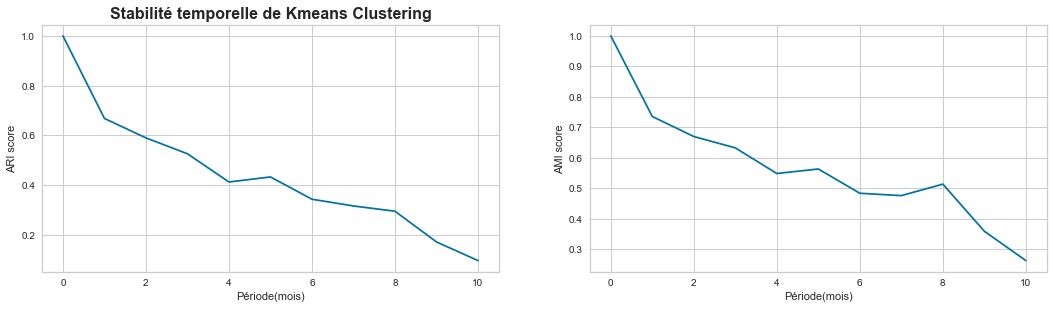

In [46]:
# Kmeans clustering avec timedelta pour comparaison
# Meme étapes précédentes avec timedelta 

#-----------------------------------------------------------------------------------------------
tmin=dt.datetime(2016,10, 3)
aris= []
amis= []

for tmax in date_range(start=dt.datetime(2017,10,3),end=dt.datetime(2018, 8, 3),step=dt.timedelta(days=30)):

#---------------------------------------------------------------------------------------------------------------

    data=df9[['customer_unique_id','order_id','order_purchase_timestamp', 'delivery_duration',
                  'total_cost', 'mean_score', 'total_orders','Recency','Frequency','Monetary']]

        #-----------------------------------
        # Faire le filtre temporel sur les données brute df9
    data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format='%y-%m-%d')   
    data = data[(data['order_purchase_timestamp'] >= tmin)& (data['order_purchase_timestamp'] <= tmax)]
    
        # Calcul  de R,F, M après le filtre
        
    rfm=data.groupby('customer_unique_id').\
    agg({'order_purchase_timestamp':lambda x: (today-x.max()).days,'order_id':lambda x: x.nunique(),
                                         'total_cost':'mean'})
        #renaming the columns of rfm

    rfm['order_purchase_timestamp'] = rfm['order_purchase_timestamp'].astype(int)

    rfm.rename(columns={'order_purchase_timestamp': 'Recency',
                         'order_id': 'Frequency',
                         'total_cost': 'Monetary'}, inplace=True)
        
    # StandardScaler
    
    scaler =StandardScaler()
    
    # suppression de la colonne 'order_purchase_timestamp'
        
    data = data.drop(columns=['order_purchase_timestamp']) 
          
    data = pd.DataFrame(scaler.fit_transform(data.select_dtypes('number')), index=data.select_dtypes('number').index, 
                            columns=data.select_dtypes('number').columns).reset_index()
       
        #---------------------------------------------------------------------------
        # Building clustering model with KMeans,  K=4 
        
    km = KMeans(n_clusters=4, init='k-means++', max_iter=1000, random_state=20)
         # Fit and predict the KMeans model
    y_km=km.fit_predict(data)             # y_km = number of Clusters
        # calcul des scores
    score_km = silhouette_score(data, km.labels_, metric='euclidean')
    print('Silhouette Score: %.3f' % score_km)
        # Dataframe avec Customer_unique_id et son cluster  (data_t1)
    data_clust = pd.DataFrame(data.select_dtypes('number')) 
    data_clust['Cluster'] = km.labels_       #Finding the clusters for the records given in our dataset
        
        #data_t1=data.groupby('customer_unique_id').agg({'Cluster':lambda x: x.nunique()})
    data_clust["customer_unique_id"]=df9["customer_unique_id"]
    data_clust=data_clust.drop(columns=["index"])
    data_t1=data_clust[["Cluster","customer_unique_id"]]
   
    #----------------------------------------------------------------------
    
    if len(kmeans.labels_)<= len(km.labels_):
        labels_true=kmeans.labels_ 
        labels= km.labels_[0:len(kmeans.labels_)]
    else:
        labels_true=kmeans.labels_[0:len(km.labels_)]
        labels= km.labels_
    print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(labels_true, labels))
        #---------------------------------------------------------------------------------------------------
        #Jointure   des dataframes  data_t0 et  data_t1 sur la colonne Customer_unique_id 
    df_clus = pd.merge(data_t0, data_t1, on='customer_unique_id')
    print(df_clus)
#---------------------------------------------------------------------------------------------------
  # plot ARI Score
    ari_kmeans=metrics.adjusted_rand_score(labels_true, labels)
    ami_kmeans=metrics.adjusted_mutual_info_score(labels_true, labels)
    aris.append(ari_kmeans)
    amis.append(ami_kmeans)

plt.figure(figsize=(18,10))
plt.subplot(221)
plt.plot(aris)
plt.title("Stabilité temporelle de Kmeans Clustering",fontweight='bold', fontsize=16)
plt.xlabel("Période(mois)")
plt.ylabel("ARI score")
plt.legend(fontsize=16)
plt.subplot(222)
plt.plot(amis)
plt.xlabel("Période(mois)")
plt.ylabel("AMI score")
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

